In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Load datasets
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')

In [27]:
# Merge datasets on customer_id
if 'CustomerID' in transactions.columns and 'CustomerID' in customers.columns:
    customer_transactions = transactions.groupby('CustomerID').agg({
        'Quantity': 'sum',
        'Price': 'sum'
    }).reset_index()
    data = pd.merge(customers, customer_transactions, on='CustomerID', how='inner')
else:
    raise ValueError("customer_id column missing in Transactions or Customers dataset.")

In [28]:
# Select relevant features for clustering
features = ['Quantity', 'Price']
clustering_data = data[features]

In [29]:
# Handle missing values and standardize data
clustering_data = clustering_data.fillna(0)  # Fill missing values if any
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

In [30]:
# Clustering
results = {}
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(clustering_data_scaled)

    # Calculate metrics
    db_index = davies_bouldin_score(clustering_data_scaled, labels)
    silhouette_avg = silhouette_score(clustering_data_scaled, labels)
    results[n_clusters] = {
        'labels': labels,
        'db_index': db_index,
        'silhouette_score': silhouette_avg,
        'model': kmeans
    }

In [31]:
# Select the best number of clusters based on DB Index (lower is better)
best_n_clusters = min(results, key=lambda k: results[k]['db_index'])
best_model = results[best_n_clusters]['model']
best_labels = results[best_n_clusters]['labels']

In [32]:
# Add cluster labels to data
data['cluster'] = best_labels

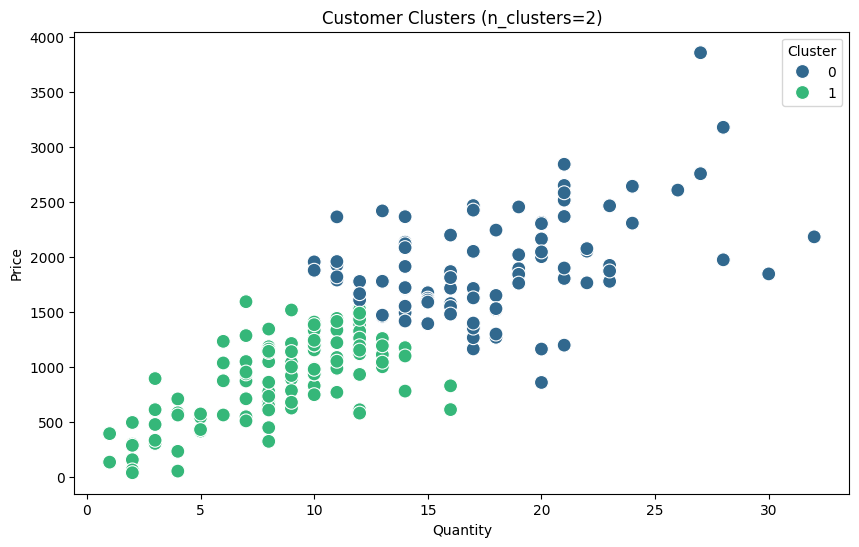

In [33]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Quantity'], y=data['Price'], hue=data['cluster'], palette='viridis', s=100)
plt.title(f'Customer Clusters (n_clusters={best_n_clusters})')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

In [34]:
# Report metrics
print("Best Number of Clusters:", best_n_clusters)
print("Davies-Bouldin Index:", results[best_n_clusters]['db_index'])
print("Silhouette Score:", results[best_n_clusters]['silhouette_score'])

Best Number of Clusters: 2
Davies-Bouldin Index: 0.745468159612312
Silhouette Score: 0.48137382946762763
